<a href="https://colab.research.google.com/github/K10KI/K10KI/blob/main/Swell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths
root_dir = '/content/drive/My Drive/SWELL'
file_path_A = f'{root_dir}/A - Computer interaction features (Ulog - All Features per minute).xlsx'
file_path_D = f'{root_dir}/D - Physiology features (HR_HRV_SCL - final).csv'

# Load the datasets
df_A = pd.read_excel(file_path_A)
df_D = pd.read_csv(file_path_D)

# Display the first few rows of each dataframe
print("First few rows of dataset A (Computer interaction features):")
print(df_A.head())

print("\nFirst few rows of dataset D (Physiology features):")
print(df_D.head())

# Display basic information about the datasets
print("\nInformation about dataset A:")
print(df_A.info())

print("\nInformation about dataset D:")
print(df_D.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of dataset A (Computer interaction features):
    PP  Blok Condition           timestamp  SnMouseAct  SnLeftClicked  \
0  PP1     1         R  20120918T131600000           0              0   
1  PP1     1         R  20120918T131700000           0              0   
2  PP1     1         R  20120918T131800000           0              0   
3  PP1     1         R  20120918T131900000           0              0   
4  PP1     1         R  20120918T132000000           0              0   

   SnRightClicked  SnDoubleClicked  SnWheel  SnDragged  ...  SnChars  \
0               0                0        0          0  ...        0   
1               0                0        0          0  ...        0   
2               0                0        0          0  ...        0   
3               0                0        0          0  ...        0   
4          

In [22]:
df_A_cleaned = df_A.drop(columns=['Unnamed: 20', 'Unnamed: 21'])
df_D_cleaned = df_D.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])


In [23]:
# normalization by PP (im not sure but)

import pandas as pd

def normalize_by_participant(df, features):
    df_normalized = df.copy()
    participants = df['PP'].unique()
    for participant in participants:
        idx = df['PP'] == participant
        df_normalized.loc[idx, features] = (df.loc[idx, features] - df.loc[idx, features].mean()) / df.loc[idx, features].std()
    return df_normalized


interaction_features = df_A_cleaned.columns.difference(['PP', 'Blok', 'Condition', 'timestamp'])
physiological_features = df_D_cleaned.columns.difference(['PP', 'C', 'Condition', 'timestamp'])

df_A_normalized = normalize_by_participant(df_A_cleaned, interaction_features)
df_D_normalized = normalize_by_participant(df_D_cleaned, physiological_features)



In [24]:
# Merge normalized datasets on common columns
df_merged = pd.merge(df_A_normalized, df_D_normalized, on=['PP', 'Condition', 'timestamp'])

# Define features and target
X = df_merged.drop(columns=['Condition', 'PP', 'timestamp'])
y = df_merged['Condition']


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average CV score: {np.mean(scores)}")

In [29]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame for consistency
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average CV score: {np.mean(scores)}")

# Logistic Regression with pipeline
pipeline_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])
print("Logistic Regression - Combined Data with Pipeline Imputation")
train_evaluate_model(pipeline_lr, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest - Combined Data with Imputation")
train_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Logistic Regression - Combined Data with Pipeline Imputation
              precision    recall  f1-score   support

           I       0.64      0.88      0.74       210
           N       0.98      0.97      0.98       189
           R       0.87      0.96      0.91        95
           T       0.52      0.18      0.27       133

    accuracy                           0.77       627
   macro avg       0.75      0.75      0.72       627
weighted avg       0.75      0.77      0.74       627

Cross-validation scores: [0.75648703 0.77245509 0.76646707 0.72255489 0.75249501]
Average CV score: 0.7540918163672654
Random Forest - Combined Data with Imputation
              precision    recall  f1-score   support

           I       0.82      0.93      0.87       210
           N       0.99      0.98      0.99       189
           R       0.92      0.99      0.95        95
           T       0.87      0.66      0.75       133

    accuracy                           0.90       627
   macro avg 

In [ ]:
# if using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imputed, y_train)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
print("Logistic Regression - Balanced Data with SMOTE")
train_evaluate_model(lr_model, X_train_balanced, y_train_balanced, X_test_imputed, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest - Balanced Data with SMOTE")
train_evaluate_model(rf_model, X_train_balanced, y_train_balanced, X_test_imputed, y_test)

Logistic Regression - Balanced Data with SMOTE
              precision    recall  f1-score   support

           I       0.69      0.56      0.62       210
           N       0.99      0.95      0.97       189
           R       0.83      0.99      0.90        95
           T       0.46      0.56      0.51       133

    accuracy                           0.74       627
   macro avg       0.74      0.77      0.75       627
weighted avg       0.75      0.74      0.74       627

Random Forest - Balanced Data with SMOTE
              precision    recall  f1-score   support

           I       0.86      0.90      0.88       210
           N       0.99      0.97      0.98       189
           R       0.91      0.99      0.95        95
           T       0.84      0.74      0.79       133

    accuracy                           0.90       627
   macro avg       0.90      0.90      0.90       627
weighted avg       0.90      0.90      0.90       627



In [ ]:
# LSTM

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)


# Reshape data for LSTM
# Assuming each sample consists of 10 timesteps
timesteps = 10
features = X_normalized.shape[1]

def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_normalized, y, timesteps)

# Encode the target variable if necessary
label_encoder = LabelEncoder()
y_seq_encoded = label_encoder.fit_transform(y_seq)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq_encoded, test_size=0.2, random_state=42)


# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(timesteps, features)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')



Epoch 1/50
63/63 [==============================] - 7s 47ms/step - loss: 0.9277 - accuracy: 0.5899 - val_loss: 0.7519 - val_accuracy: 0.6720
Epoch 2/50
63/63 [==============================] - 1s 21ms/step - loss: 0.6715 - accuracy: 0.6880 - val_loss: 0.6283 - val_accuracy: 0.7180
Epoch 3/50
63/63 [==============================] - 1s 16ms/step - loss: 0.5593 - accuracy: 0.7626 - val_loss: 0.5606 - val_accuracy: 0.7520
Epoch 4/50
63/63 [==============================] - 1s 13ms/step - loss: 0.4956 - accuracy: 0.7867 - val_loss: 0.4957 - val_accuracy: 0.7740
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.4429 - accuracy: 0.8147 - val_loss: 0.4398 - val_accuracy: 0.8140
Epoch 6/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3891 - accuracy: 0.8483 - val_loss: 0.4079 - val_accuracy: 0.8300
Epoch 7/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3563 - accuracy: 0.8608 - val_loss: 0.3915 - val_accuracy: 0.8320
Epoch 8/50
63

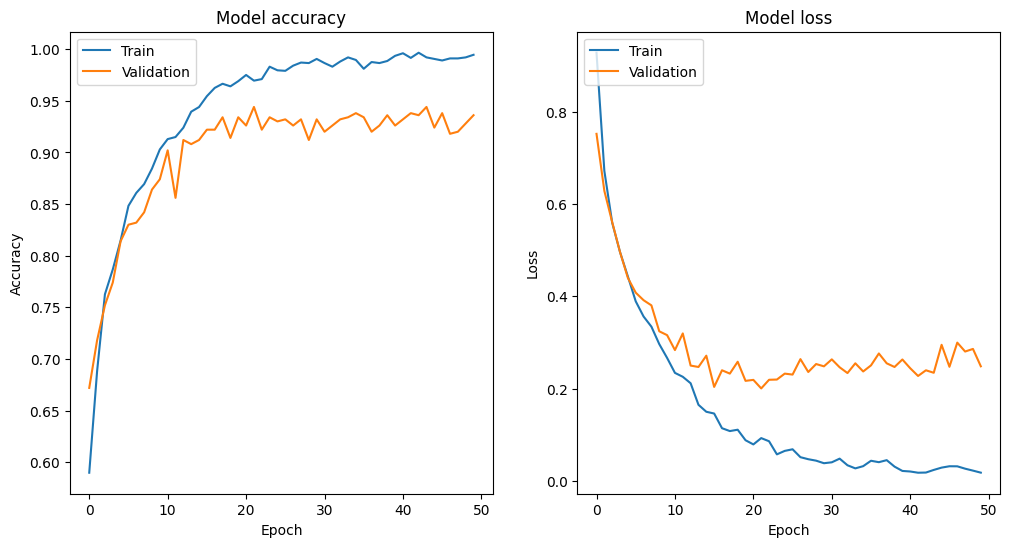

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


The divergence between training and validation curves after around 10-20 epochs suggests overfitting. The model performs well on the training data but does not generalize as effectively to the validation data.

In [ ]:
# earlystopping

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/50
63/63 [==============================] - 1s 23ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 0.3473 - val_accuracy: 0.9200
Epoch 2/50
63/63 [==============================] - 1s 20ms/step - loss: 0.0202 - accuracy: 0.9920 - val_loss: 0.2891 - val_accuracy: 0.9320
Epoch 3/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0243 - accuracy: 0.9895 - val_loss: 0.3030 - val_accuracy: 0.9380
Epoch 4/50
63/63 [==============================] - 1s 13ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.2733 - val_accuracy: 0.9340
Epoch 5/50
63/63 [==============================] - 1s 12ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.2780 - val_accuracy: 0.9300
Epoch 6/50
63/63 [==============================] - 1s 12ms/step - loss: 0.0232 - accuracy: 0.9940 - val_loss: 0.2827 - val_accuracy: 0.9360
Epoch 7/50
63/63 [==============================] - 1s 12ms/step - loss: 0.0198 - accuracy: 0.9960 - val_loss: 0.2471 - val_accuracy: 0.9380
Epoch 8/50
63

12 ephoch is the best

20/20 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           I       0.96      0.97      0.96       203
           N       0.98      0.99      0.99       188
           R       0.91      0.77      0.83        95
           T       0.91      0.96      0.93       139

    accuracy                           0.95       625
   macro avg       0.94      0.92      0.93       625
weighted avg       0.95      0.95      0.94       625



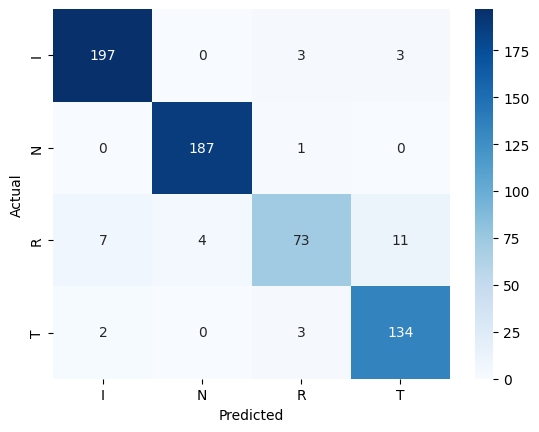

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [2]:
# caculate importances from RF

In [ ]:
# drop the pp, c, blok, timestep, columns for feature importance analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of dataset A (Computer interaction features):
    PP  Blok Condition           timestamp  SnMouseAct  SnLeftClicked  \
0  PP1     1         R  20120918T131600000           0              0   
1  PP1     1         R  20120918T131700000           0              0   
2  PP1     1         R  20120918T131800000           0              0   
3  PP1     1         R  20120918T131900000           0              0   
4  PP1     1         R  20120918T132000000           0              0   

   SnRightClicked  SnDoubleClicked  SnWheel  SnDragged  ...  SnChars  \
0               0                0        0          0  ...        0   
1               0                0        0          0  ...        0   
2               0                0        0          0  ...        0   
3               0                0        0          0  ...        0   
4          

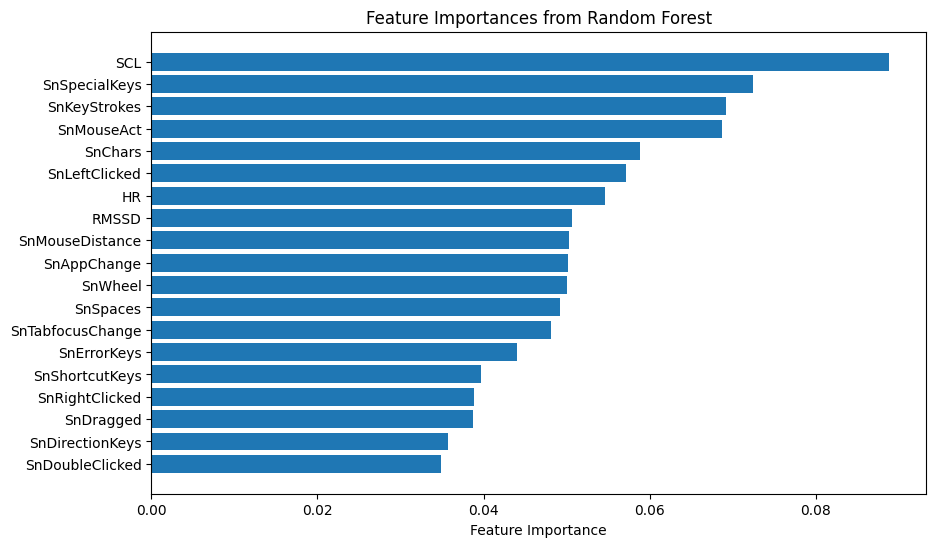

In [13]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths
root_dir = '/content/drive/My Drive/SWELL'
file_path_A = f'{root_dir}/A - Computer interaction features (Ulog - All Features per minute).xlsx'
file_path_D = f'{root_dir}/D - Physiology features (HR_HRV_SCL - final).csv'

# Load the datasets
df_A = pd.read_excel(file_path_A)
df_D = pd.read_csv(file_path_D)

# Display the first few rows of each dataframe
print("First few rows of dataset A (Computer interaction features):")
print(df_A.head())

print("\nFirst few rows of dataset D (Physiology features):")
print(df_D.head())

# Display basic information about the datasets
print("\nInformation about dataset A:")
print(df_A.info())

print("\nInformation about dataset D:")
print(df_D.info())

# Clean the datasets
df_A_cleaned = df_A.drop(columns=['Unnamed: 20', 'Unnamed: 21'])
df_D_cleaned = df_D.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

# Function to normalize by participant
def normalize_by_participant(df, features):
    df_normalized = df.copy()
    participants = df['PP'].unique()
    for participant in participants:
        idx = df['PP'] == participant
        df_normalized.loc[idx, features] = (df.loc[idx, features] - df.loc[idx, features].mean()) / df.loc[idx, features].std()
    return df_normalized

interaction_features = df_A_cleaned.columns.difference(['PP', 'Blok', 'Condition', 'timestamp'])
physiological_features = df_D_cleaned.columns.difference(['PP', 'C', 'Condition', 'timestamp'])

df_A_normalized = normalize_by_participant(df_A_cleaned, interaction_features)
df_D_normalized = normalize_by_participant(df_D_cleaned, physiological_features)

# Merge normalized datasets on common columns
df_merged = pd.merge(df_A_normalized, df_D_normalized, on=['PP', 'Condition', 'timestamp'])

# Define features and target, exclude non-feature columns
X = df_merged.drop(columns=['Condition', 'PP', 'timestamp', 'Blok', 'C'])
y = df_merged['Condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame for consistency
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average CV score: {np.mean(scores)}")

# Logistic Regression with pipeline
pipeline_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])
print("Logistic Regression - Combined Data with Pipeline Imputation")
train_evaluate_model(pipeline_lr, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest - Combined Data with Imputation")
train_evaluate_model(rf_model, X_train_imputed, y_train, X_test_imputed, y_test)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Assuming your feature names are stored in a list or dataframe columns
feature_names = np.array(X_train_imputed.columns)

# Create a bar plot of feature importances
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


Mounted at /content/drive
First few rows of dataset A (Computer interaction features):
    PP  Blok Condition           timestamp  SnMouseAct  SnLeftClicked  \
0  PP1     1         R  20120918T131600000           0              0   
1  PP1     1         R  20120918T131700000           0              0   
2  PP1     1         R  20120918T131800000           0              0   
3  PP1     1         R  20120918T131900000           0              0   
4  PP1     1         R  20120918T132000000           0              0   

   SnRightClicked  SnDoubleClicked  SnWheel  SnDragged  ...  SnChars  \
0               0                0        0          0  ...        0   
1               0                0        0          0  ...        0   
2               0                0        0          0  ...        0   
3               0                0        0          0  ...        0   
4               0                0        0          0  ...        0   

   SnSpecialKeys  SnDirectionKeys  SnErro

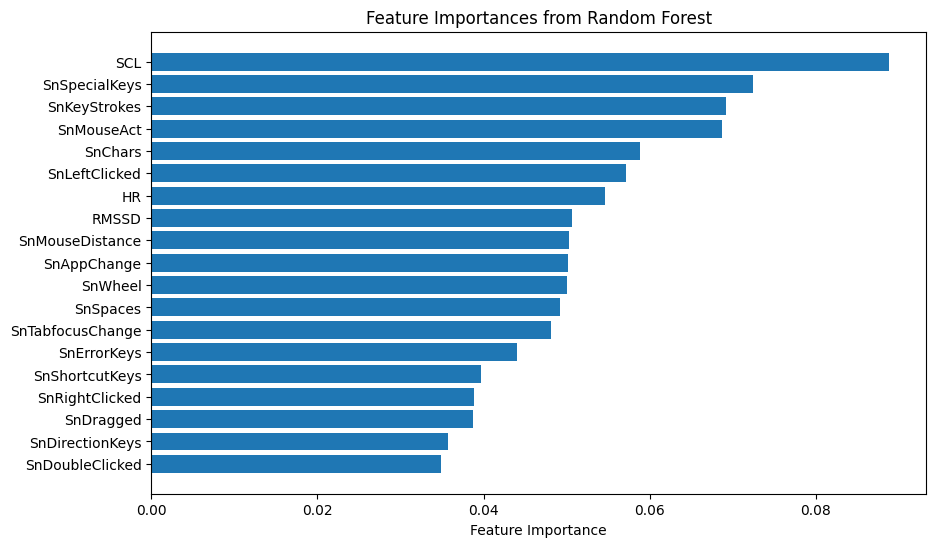

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths
root_dir = '/content/drive/My Drive/SWELL'
file_path_A = f'{root_dir}/A - Computer interaction features (Ulog - All Features per minute).xlsx'
file_path_D = f'{root_dir}/D - Physiology features (HR_HRV_SCL - final).csv'

# Load the datasets
df_A = pd.read_excel(file_path_A)
df_D = pd.read_csv(file_path_D)

# Display the first few rows of each dataframe
print("First few rows of dataset A (Computer interaction features):")
print(df_A.head())

print("\nFirst few rows of dataset D (Physiology features):")
print(df_D.head())

# Display basic information about the datasets
print("\nInformation about dataset A:")
print(df_A.info())

print("\nInformation about dataset D:")
print(df_D.info())

# Clean the datasets
df_A_cleaned = df_A.drop(columns=['Unnamed: 20', 'Unnamed: 21'])
df_D_cleaned = df_D.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

# Function to normalize by participant
def normalize_by_participant(df, features):
    df_normalized = df.copy()
    participants = df['PP'].unique()
    for participant in participants:
        idx = df['PP'] == participant
        df_normalized.loc[idx, features] = (df.loc[idx, features] - df.loc[idx, features].mean()) / df.loc[idx, features].std()
    return df_normalized

interaction_features = df_A_cleaned.columns.difference(['PP', 'Blok', 'Condition', 'timestamp'])
physiological_features = df_D_cleaned.columns.difference(['PP', 'C', 'Condition', 'timestamp'])

df_A_normalized = normalize_by_participant(df_A_cleaned, interaction_features)
df_D_normalized = normalize_by_participant(df_D_cleaned, physiological_features)

# Merge normalized datasets on common columns
df_merged = pd.merge(df_A_normalized, df_D_normalized, on=['PP', 'Condition', 'timestamp'])

# Define features and target, exclude non-feature columns
X = df_merged.drop(columns=['Condition', 'PP', 'timestamp', 'Blok', 'C'])
y = df_merged['Condition']

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert back to DataFrame for consistency
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average CV score: {np.mean(scores)}")

# Logistic Regression with pipeline
pipeline_lr = Pipeline(steps=[
    ('logistic_regression', LogisticRegression(max_iter=1000))
])
print("Logistic Regression - Combined Data with Standard Scaling")
train_evaluate_model(pipeline_lr, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest - Combined Data with Standard Scaling")
train_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Extract feature importances
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Assuming your feature names are stored in a list or dataframe columns
feature_names = np.array(X_train.columns)

# Create a bar plot of feature importances
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of dataset A (Computer interaction features):
    PP  Blok Condition           timestamp  SnMouseAct  SnLeftClicked  \
0  PP1     1         R  20120918T131600000           0              0   
1  PP1     1         R  20120918T131700000           0              0   
2  PP1     1         R  20120918T131800000           0              0   
3  PP1     1         R  20120918T131900000           0              0   
4  PP1     1         R  20120918T132000000           0              0   

   SnRightClicked  SnDoubleClicked  SnWheel  SnDragged  ...  SnChars  \
0               0                0        0          0  ...        0   
1               0                0        0          0  ...        0   
2               0                0        0          0  ...        0   
3               0                0        0          0  ...        0   
4          

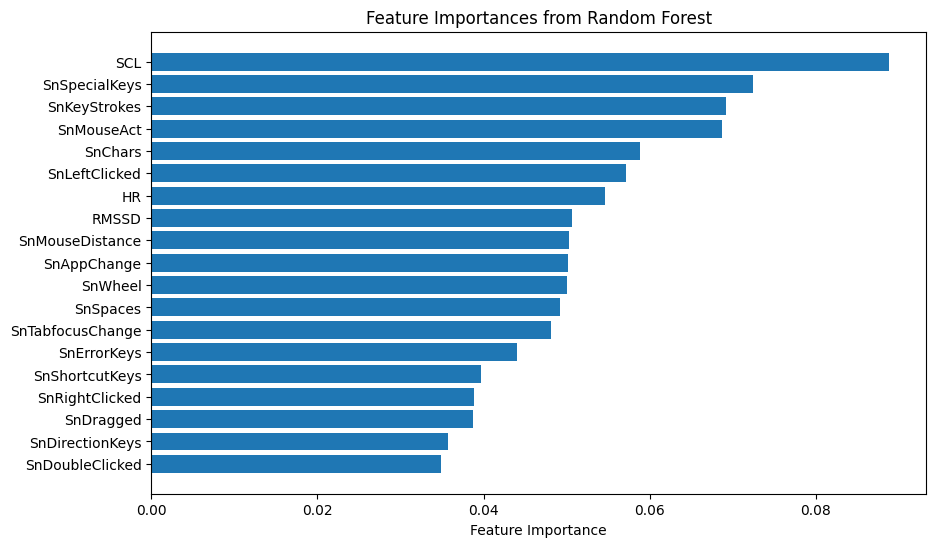

Epoch 1/70
63/63 [==============================] - 7s 45ms/step - loss: 1.3886 - accuracy: 0.2310 - val_loss: 1.3805 - val_accuracy: 0.2505 - lr: 0.0010
Epoch 2/70
63/63 [==============================] - 2s 29ms/step - loss: 1.3738 - accuracy: 0.2981 - val_loss: 1.3810 - val_accuracy: 0.2745 - lr: 0.0010
Epoch 3/70
63/63 [==============================] - 2s 29ms/step - loss: 1.3694 - accuracy: 0.3021 - val_loss: 1.3936 - val_accuracy: 0.2445 - lr: 0.0010
Epoch 4/70
63/63 [==============================] - 1s 20ms/step - loss: 1.3663 - accuracy: 0.3136 - val_loss: 1.3898 - val_accuracy: 0.2806 - lr: 0.0010
Epoch 5/70
63/63 [==============================] - 1s 20ms/step - loss: 1.3619 - accuracy: 0.2961 - val_loss: 1.3943 - val_accuracy: 0.2725 - lr: 0.0010
Epoch 6/70
63/63 [==============================] - 1s 20ms/step - loss: 1.3512 - accuracy: 0.3292 - val_loss: 1.3944 - val_accuracy: 0.2725 - lr: 0.0010
Epoch 7/70
63/63 [==============================] - 1s 19ms/step - loss: 1.3

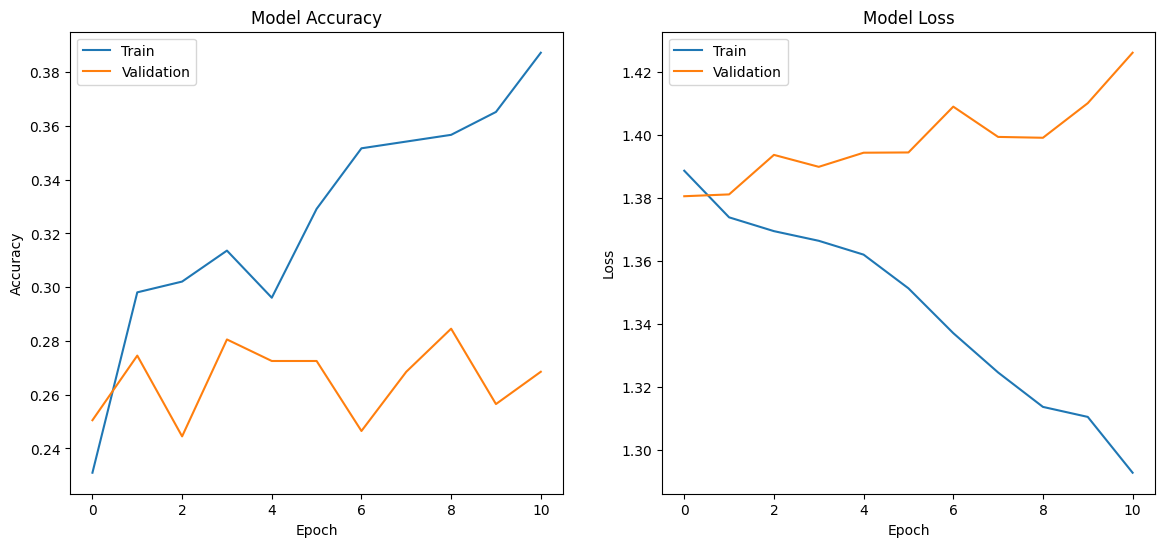

In [6]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths
root_dir = '/content/drive/My Drive/SWELL'
file_path_A = f'{root_dir}/A - Computer interaction features (Ulog - All Features per minute).xlsx'
file_path_D = f'{root_dir}/D - Physiology features (HR_HRV_SCL - final).csv'

# Load the datasets
df_A = pd.read_excel(file_path_A)
df_D = pd.read_csv(file_path_D)

# Display the first few rows of each dataframe
print("First few rows of dataset A (Computer interaction features):")
print(df_A.head())

print("\nFirst few rows of dataset D (Physiology features):")
print(df_D.head())

# Display basic information about the datasets
print("\nInformation about dataset A:")
print(df_A.info())

print("\nInformation about dataset D:")
print(df_D.info())

# Clean the datasets
df_A_cleaned = df_A.drop(columns=['Unnamed: 20', 'Unnamed: 21'])
df_D_cleaned = df_D.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

# Function to normalize by participant
def normalize_by_participant(df, features):
    df_normalized = df.copy()
    participants = df['PP'].unique()
    for participant in participants:
        idx = df['PP'] == participant
        df_normalized.loc[idx, features] = (df.loc[idx, features] - df.loc[idx, features].mean()) / df.loc[idx, features].std()
    return df_normalized

interaction_features = df_A_cleaned.columns.difference(['PP', 'Blok', 'Condition', 'timestamp'])
physiological_features = df_D_cleaned.columns.difference(['PP', 'C', 'Condition', 'timestamp'])

df_A_normalized = normalize_by_participant(df_A_cleaned, interaction_features)
df_D_normalized = normalize_by_participant(df_D_cleaned, physiological_features)

# Merge normalized datasets on common columns
df_merged = pd.merge(df_A_normalized, df_D_normalized, on=['PP', 'Condition', 'timestamp'])

# Define features and target, exclude non-feature columns
X = df_merged.drop(columns=['Condition', 'PP', 'timestamp', 'Blok', 'C'])
y = df_merged['Condition']

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert back to DataFrame for consistency
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average CV score: {np.mean(scores)}")

# Logistic Regression with pipeline
pipeline_lr = Pipeline(steps=[
    ('logistic_regression', LogisticRegression(max_iter=1000))
])
print("Logistic Regression - Combined Data with Standard Scaling")
train_evaluate_model(pipeline_lr, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest - Combined Data with Standard Scaling")
train_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Extract feature importances
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Assuming your feature names are stored in a list or dataframe columns
feature_names = np.array(X_train.columns)

# Create a bar plot of feature importances
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

# LSTM Model

# Create sequences for the data
timesteps = 10  # Adjust this as needed
features = X_train.shape[1]

def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train.values, y_train.values, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test.values, y_test.values, timesteps)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_seq_encoded = label_encoder.fit_transform(y_train_seq)
y_test_seq_encoded = label_encoder.transform(y_test_seq)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(timesteps, features)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq_encoded), y=y_train_seq_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with class weights and callbacks
history = model.fit(X_train_seq, y_train_seq_encoded, epochs=70, batch_size=32, validation_split=0.2,
                    class_weight=class_weights_dict, callbacks=[lr_scheduler, early_stopping])

# Evaluate the LSTM model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq_encoded)
print(f'LSTM Test Accuracy: {test_acc}')

# Predict on the test set and print classification report
y_pred_probs = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test_seq_encoded, y_pred, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


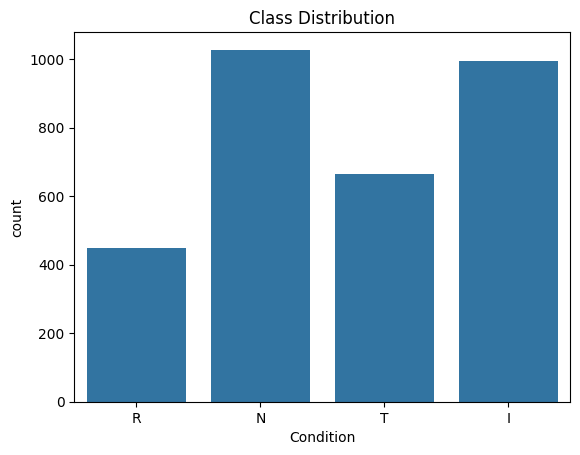

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(x='Condition', data=df_merged)
plt.title('Class Distribution')
plt.show()


              Blok   SnMouseAct  SnLeftClicked  SnRightClicked  \
count  3132.000000  3132.000000    3132.000000     3132.000000   
mean      1.935504    -0.000838      -0.001073        0.000195   
std       0.826535     0.995006       0.994604        0.997001   
min       1.000000    -1.420024      -1.350363       -0.644828   
25%       1.000000    -0.758805      -0.749715       -0.340554   
50%       2.000000    -0.287219      -0.295698       -0.276953   
75%       3.000000     0.543857       0.555277       -0.217548   
max       3.000000     5.953709       4.226274        9.159372   

       SnDoubleClicked      SnWheel    SnDragged  SnMouseDistance  \
count      3132.000000  3132.000000  3132.000000      3130.000000   
mean          0.000746     0.000206    -0.001653         0.000405   
std           0.997144     0.997039     0.991028         0.996686   
min          -0.557805    -0.985070    -0.996529        -1.148973   
25%          -0.383306    -0.554734    -0.567006        -0.7

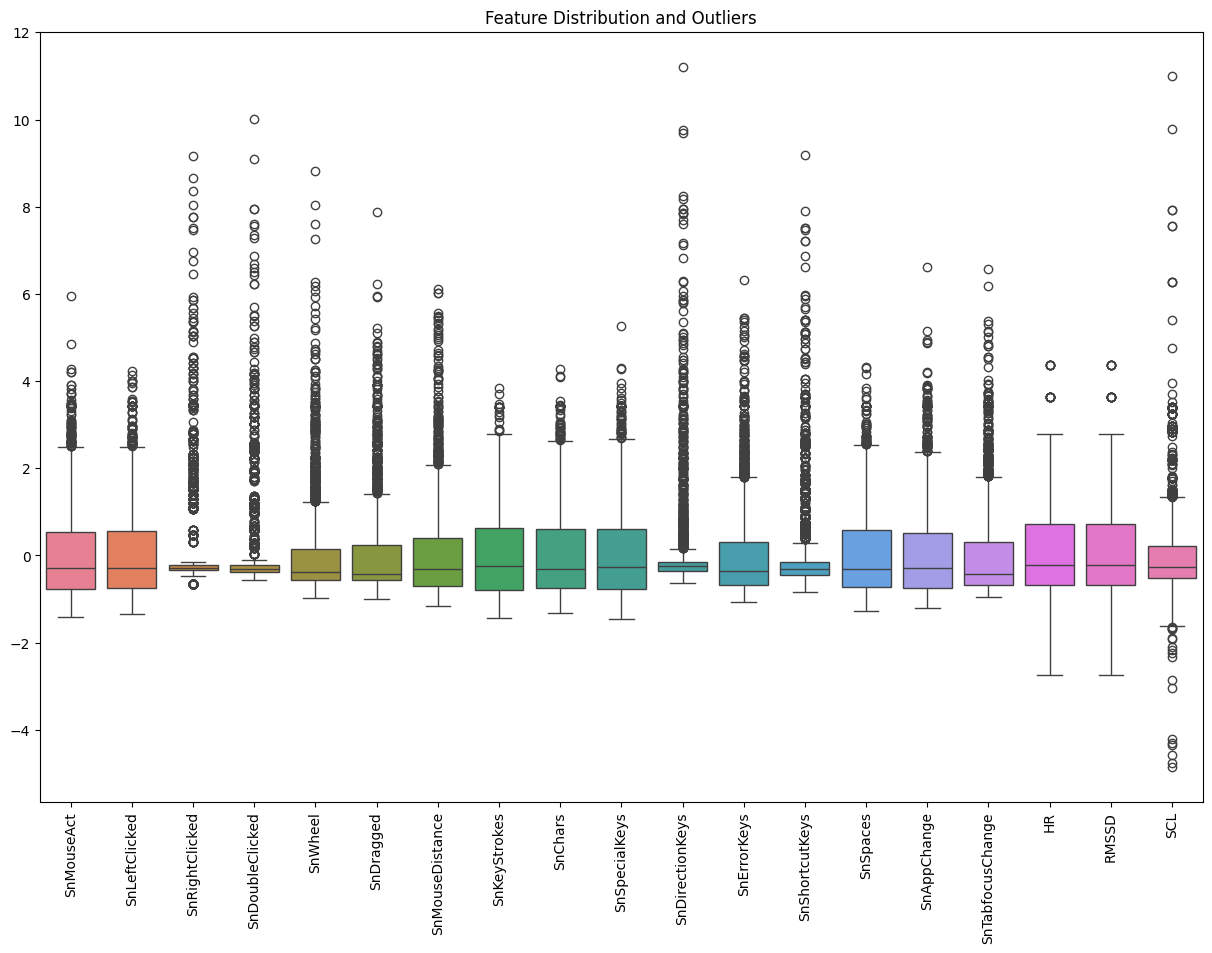

In [8]:
# Summary statistics
print(df_merged.describe())

# Check for missing values
print(df_merged.isnull().sum())

# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_merged.drop(columns=['Condition', 'PP', 'timestamp', 'Blok', 'C']))
plt.title('Feature Distribution and Outliers')
plt.xticks(rotation=90)
plt.show()


In [10]:
# Display the first few rows of the merged dataframe
print(df_merged.head())

# Display basic information about the merged dataframe
print(df_merged.info())


    PP  Blok Condition           timestamp  SnMouseAct  SnLeftClicked  \
0  PP1     1         R  20120918T131600000   -0.985516      -1.049851   
1  PP1     1         R  20120918T131700000   -0.985516      -1.049851   
2  PP1     1         R  20120918T131800000   -0.985516      -1.049851   
3  PP1     1         R  20120918T131900000   -0.985516      -1.049851   
4  PP1     1         R  20120918T132000000   -0.985516      -1.049851   

   SnRightClicked  SnDoubleClicked   SnWheel  SnDragged  ...  SnDirectionKeys  \
0       -0.153704        -0.352318 -0.554734  -0.536355  ...        -0.327541   
1       -0.153704        -0.352318 -0.554734  -0.536355  ...        -0.327541   
2       -0.153704        -0.352318 -0.554734  -0.536355  ...        -0.327541   
3       -0.153704        -0.352318 -0.554734  -0.536355  ...        -0.327541   
4       -0.153704        -0.352318 -0.554734  -0.536355  ...        -0.327541   

   SnErrorKeys  SnShortcutKeys  SnSpaces  SnAppChange  SnTabfocusChange  C

In [12]:
# add smote to see whether it's better


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Impute missing values with mean before applying SMOTE
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Use RobustScaler to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


Epoch 1/70
82/82 [==============================] - 11s 61ms/step - loss: 1.3954 - accuracy: 0.2450 - val_loss: 1.3966 - val_accuracy: 0.2348 - lr: 0.0010
Epoch 2/70
82/82 [==============================] - 3s 40ms/step - loss: 1.3803 - accuracy: 0.2782 - val_loss: 1.3890 - val_accuracy: 0.2454 - lr: 0.0010
Epoch 3/70
82/82 [==============================] - 3s 33ms/step - loss: 1.3798 - accuracy: 0.2901 - val_loss: 1.3922 - val_accuracy: 0.2439 - lr: 0.0010
Epoch 4/70
82/82 [==============================] - 3s 32ms/step - loss: 1.3734 - accuracy: 0.3092 - val_loss: 1.3956 - val_accuracy: 0.2378 - lr: 0.0010
Epoch 5/70
82/82 [==============================] - 2s 19ms/step - loss: 1.3656 - accuracy: 0.3206 - val_loss: 1.3956 - val_accuracy: 0.2393 - lr: 0.0010
Epoch 6/70
82/82 [==============================] - 2s 20ms/step - loss: 1.3507 - accuracy: 0.3443 - val_loss: 1.3949 - val_accuracy: 0.2591 - lr: 0.0010
Epoch 7/70
82/82 [==============================] - 2s 20ms/step - loss: 1.

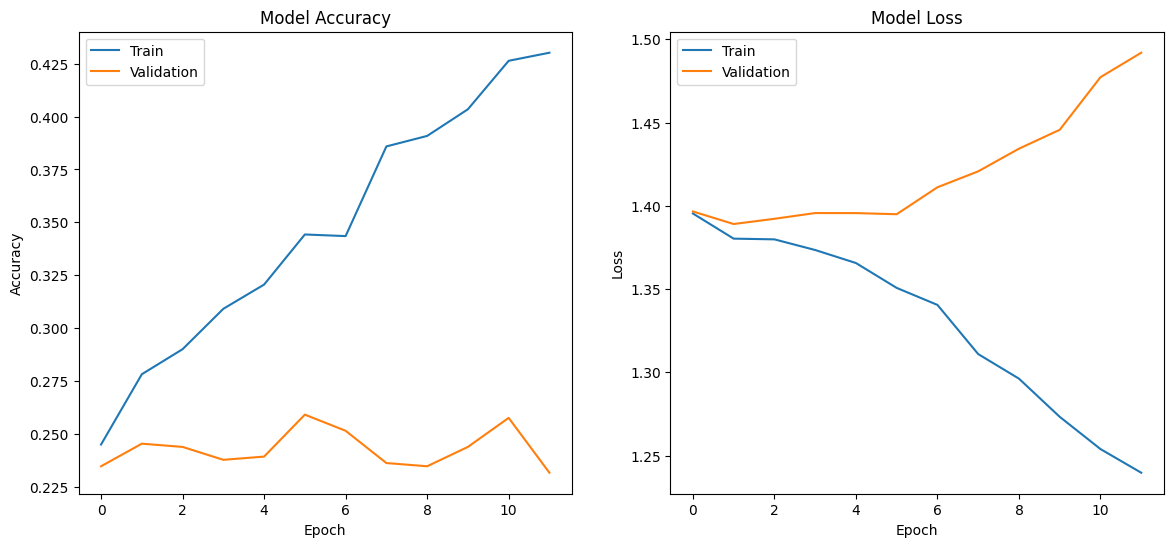

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers import Adam
import matplotlib.pyplot as plt
# LSTM Model


# Convert back to DataFrame for consistency
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


# Create sequences for the data
timesteps = 10  # Adjust this as needed
features = X_train.shape[1]

def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train.values, y_train.values, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test.values, y_test.values, timesteps)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_seq_encoded = label_encoder.fit_transform(y_train_seq)
y_test_seq_encoded = label_encoder.transform(y_test_seq)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(timesteps, features)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq_encoded), y=y_train_seq_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with class weights and callbacks
history = model.fit(X_train_seq, y_train_seq_encoded, epochs=70, batch_size=32, validation_split=0.2,
                    class_weight=class_weights_dict, callbacks=[lr_scheduler, early_stopping])

# Evaluate the LSTM model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq_encoded)
print(f'LSTM Test Accuracy: {test_acc}')

# Predict on the test set and print classification report
y_pred_probs = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test_seq_encoded, y_pred, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [23]:
# After imputation and scaling
print(X.shape)
print(X_imputed.shape)
print(X_scaled.shape)


(3132, 19)
(3132, 19)
(4108, 19)


In [24]:
# Check the columns of X after preprocessing
print("Columns of X after preprocessing:", X.columns)


Columns of X after preprocessing: Index(['SnMouseAct', 'SnLeftClicked', 'SnRightClicked', 'SnDoubleClicked',
       'SnWheel', 'SnDragged', 'SnMouseDistance', 'SnKeyStrokes', 'SnChars',
       'SnSpecialKeys', 'SnDirectionKeys', 'SnErrorKeys', 'SnShortcutKeys',
       'SnSpaces', 'SnAppChange', 'SnTabfocusChange', 'HR', 'RMSSD', 'SCL'],
      dtype='object')
